In [9]:
import ezdxf

# Load the DXF document
doc = ezdxf.readfile("C:/Users/tyler/Documents/PPA_ws/dxf_files/spiral.dxf")

# Get the modelspace which contains the entities
modelspace = doc.modelspace()

# Open the output file
with open("C:/Users/tyler/Documents/PPA_ws/csv_files/coordinates.csv", "w") as file:
    # Write the headers to the file
    file.write("X,Y,Z\n")
    
    # Iterate over each entity in the modelspace
    for entity in modelspace:
        # Check if the entity is a line
        if entity.dxftype() == 'LINE':
            # Write the start and end points of the line to the file
            file.write(f"{entity.dxf.start.x},{entity.dxf.start.y},{entity.dxf.start.z}\n")
            file.write(f"{entity.dxf.end.x},{entity.dxf.end.y},{entity.dxf.end.z}\n")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


       X     Y    Z
0    0.0   0.0  0.0
1    0.0  25.0  0.0
2    0.0  25.0  0.0
3   25.0  25.0  0.0
4   25.0  25.0  0.0
5   25.0 -25.0  0.0
6   25.0 -25.0  0.0
7  -25.0 -25.0  0.0
8  -25.0 -25.0  0.0
9  -25.0  50.0  0.0
10 -25.0  50.0  0.0
11  50.0  50.0  0.0
12  50.0  50.0  0.0
13  50.0 -50.0  0.0
14  50.0 -50.0  0.0
15 -50.0 -50.0  0.0
16 -50.0 -50.0  0.0
17 -50.0  75.0  0.0
18 -50.0  75.0  0.0
19  75.0  75.0  0.0
20  75.0  75.0  0.0
21  75.0 -50.0  0.0


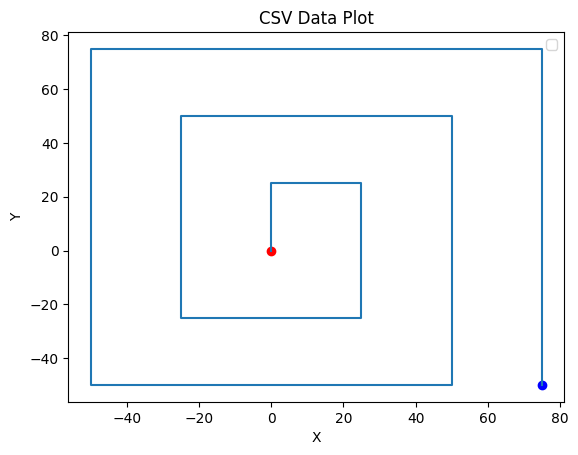

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv("C:/Users/tyler/Documents/PPA_ws/csv_files/coordinates.csv")

print(data) # debug

# Get the 'X' and 'Y' columns
x = data['X']
y = data['Y']

# Plot the data on a 2D XY plane
plt.plot(x, y)
# Add a red dot for the first point
plt.scatter(x.iloc[0], y.iloc[0], color='red')
# Add a blue dot for the last point
plt.scatter(x.iloc[-1], y.iloc[-1], color='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('CSV Data Plot')
plt.show()